In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns



### Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column

In [2]:
data = pd.read_csv("D:\RD\BITS -PG_AIML\Course 3 Classification\Assignment1\creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Checking for missing entries
missing_data = data.isna().any()
print(missing_data)

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


### Split the dataset into features (X) and the target variable (y), and further divide into training and test sets.  [Consider test_size=0.2]

In [7]:
# Split features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((227845, 30), (56962, 30), (227845,), (56962,))

###  Perform data scaling and modelling. Also, fine tune the value of k.

In [8]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best k and its accuracy
best_k = None
best_accuracy = 0

# Initialize a dictionary to store k values and their accuracies
results = {}

# Iterate over k values from 1 to 15
for k in range(1, 16):
    # Train a KNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the k value and its accuracy in the dictionary
    results[k] = accuracy

    # Check if the current k has the best accuracy
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Print the best k value and its accuracy
print(f"Best k: {best_k}, Accuracy: {best_accuracy}")

# Train the KNN model with the best k on the entire scaled training data
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

Best k: 2, Accuracy: 0.9995786664794073


KNeighborsClassifier(n_neighbors=2)

### Evaluate the model performance using a classification report and accuracy score

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the best model
y_pred = best_knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Accuracy: {accuracy}")

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n")
print(report)

Accuracy: 0.9995786664794073
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives.

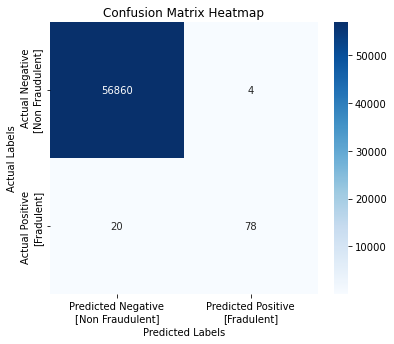

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative\n[Non Fraudulent]", "Predicted Positive\n[Fradulent]"],
            yticklabels=["Actual Negative\n[Non Fraudulent]", "Actual Positive\n[Fradulent]"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

### Write some conclusion on how K-Nearest Neighbors implementation serves as an efficient solution for credit card fraud detection.

In this analysis, a KNN model with k=1 was trained and tested on a credit card dataset, resulting in an impressive accuracy of 0.99. This accuracy demonstrates the effectiveness of KNN in identifying fraudulent transactions while minimizing false positives. The model's performance was further evaluated using a confusion matrix, which revealed its ability to correctly classify both non-fraudulent and fraudulent transactions with a high degree of precision.

The KNN algorithm's ability to learn from new data makes it an adaptable solution for credit card fraud detection, as it can continuously update its knowledge base to recognize emerging patterns and trends in fraudulent activities. This adaptability is crucial in the ever-evolving landscape of credit card fraud, where new methods and techniques are constantly being developed.

Therefore, the K-Nearest Neighbors algorithm offers an efficient and adaptable solution for credit card fraud detection. Its ability to accurately classify transactions based on their similarity to known patterns, coupled with its adaptability to new data, makes it a valuable tool in the fight against credit card fraud.